# Download an ImageNette dataset

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate


In [3]:
import fastai
import torch
import torchvision
print(fastai.__version__)
print(torch.__version__)
print(torchvision.__version__)

1.0.58
1.0.0
0.2.1


## Downloading the ImageNette dataset

In [4]:
path = untar_data(URLs.IMAGENETTE_160); path

PosixPath('/Users/sebastian/.fastai/data/imagenette-160')

In [5]:
path.parent.ls()

[PosixPath('/Users/sebastian/.fastai/data/imdb_sample.tgz'),
 PosixPath('/Users/sebastian/.fastai/data/imagenette-160.tgz'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated'),
 PosixPath('/Users/sebastian/.fastai/data/mnist_sample.tgz'),
 PosixPath('/Users/sebastian/.fastai/data/mnist.pkl.gz'),
 PosixPath('/Users/sebastian/.fastai/data/mnist_png'),
 PosixPath('/Users/sebastian/.fastai/data/mnist_sample'),
 PosixPath('/Users/sebastian/.fastai/data/imagenette-160'),
 PosixPath('/Users/sebastian/.fastai/data/imdb_sample')]

In [6]:
# shutil.rmtree(path.parent/'is_img_rotated')

In [7]:
path.ls()

[PosixPath('/Users/sebastian/.fastai/data/imagenette-160/models'),
 PosixPath('/Users/sebastian/.fastai/data/imagenette-160/train'),
 PosixPath('/Users/sebastian/.fastai/data/imagenette-160/val')]

## Create rotated duplicates of the data

In [8]:
path_dataset = path.parent/'is_img_rotated'
path_dataset.mkdir(parents=True, exist_ok=True)
path_straight = path_dataset/'straight'
path_straight.mkdir(parents=True, exist_ok=True)
path_rot180 = path_dataset/'rotated180'
path_rot180.mkdir(parents=True, exist_ok=True)
path_rot90 = path_dataset/'rotated90'
path_rot90.mkdir(parents=True, exist_ok=True)
path_rot270 = path_dataset/'rotated270'
path_rot270.mkdir(parents=True, exist_ok=True)

In [9]:
path_dataset.ls()

[PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/straight'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated180'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/models'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated270'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated90')]

In [10]:
# ## Uncomment when running the first time
# shutil.rmtree(path_straight)
# shutil.copytree(path/'train', path_straight/'train')
# shutil.copytree(path/'val', path_straight/'val')

In [11]:
path_straight.ls()

[PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/straight/train'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/straight/val')]

In [12]:
il = ImageList.from_folder(path_dataset)
il.items

array([PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/straight/train/n03394916/n03394916_58454.JPEG'),
       PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/straight/train/n03394916/n03394916_32588.JPEG'),
       PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/straight/train/n03394916/n03394916_32422.JPEG'),
       PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/straight/train/n03394916/n03394916_33663.JPEG'), ...,
       PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/val/n02979186/ILSVRC2012_val_00034563.JPEG'),
       PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/val/n02979186/ILSVRC2012_val_00016648.JPEG'),
       PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/val/n02979186/ILSVRC2012_val_00042347.JPEG'),
       PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/val/n02979186/ILSVRC2012_val_00042982.JPEG')],
      dtype=object)

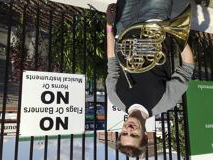

In [13]:
img = PIL.Image.open(il.items[5])
img.rotate(180)

In [14]:
def rotateImage(fn, i, path, angleDeg=90):
    dest = path/fn.relative_to(path_straight)
    dest.parent.mkdir(parents=True, exist_ok=True)
    img = PIL.Image.open(fn)
    flipped_img = img.rotate(angleDeg)
    flipped_img.save(dest, quality=60)

rotateImage(il.items[5], 0, path_rot180, angleDeg=180)

In [15]:
(path_rot180/'train').ls()

[PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated180/train/n03394916'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated180/train/n03417042'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated180/train/n03445777'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated180/train/n02102040'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated180/train/n03425413'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated180/train/n03888257'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated180/train/n03028079'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated180/train/n03000684'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated180/train/n01440764'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated180/train/n02979186')]

In [16]:
# ## Uncomment when running the first time
# parallel(partial(rotateImage, path=path_rot180, angleDeg=180), il.items)
# parallel(partial(rotateImage, path=path_rot90, angleDeg=90), il.items)
# parallel(partial(rotateImage, path=path_rot270, angleDeg=270), il.items)

In [17]:
(path_rot90/'val').ls()

[PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/val/n03394916'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/val/n03417042'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/val/n03445777'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/val/n02102040'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/val/n03425413'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/val/n03888257'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/val/n03028079'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/val/n03000684'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/val/n01440764'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/val/n02979186')]

In [18]:
(path_rot90).ls()

[PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/train'),
 PosixPath('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/val')]

In [19]:
il = ImageList.from_folder(path_dataset)
il

ImageList (53576 items)
Image (3, 160, 240),Image (3, 160, 213),Image (3, 160, 213),Image (3, 160, 228),Image (3, 236, 160)
Path: /Users/sebastian/.fastai/data/is_img_rotated

## Create a databunch

In [20]:
init_sz = 64
bs = 32
tfms = get_transforms(do_flip=False, max_rotate=5)

straight


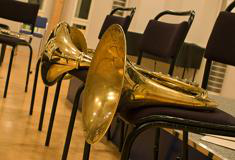

In [98]:
r = random.randint(0,len(il))
print(il.items[r].parts[-4])
open_image(il.items[r])

In [22]:
lbl_fn = lambda o: (o.parts if isinstance(o, Path) else o.split(os.path.sep))[-4]
lbl_fn(il.items[5])

'straight'

In [23]:
valid_fn = lambda o: (o.parts if isinstance(o, Path) else o.split(os.path.sep))[-3]=='val'
valid_fn(il.items[5])

False

In [24]:
sil = il.split_by_valid_func(valid_fn)
sil

ItemLists;

Train: ImageList (51576 items)
Image (3, 160, 240),Image (3, 160, 213),Image (3, 160, 213),Image (3, 160, 228),Image (3, 236, 160)
Path: /Users/sebastian/.fastai/data/is_img_rotated;

Valid: ImageList (2000 items)
Image (3, 160, 231),Image (3, 160, 240),Image (3, 160, 240),Image (3, 160, 239),Image (3, 160, 239)
Path: /Users/sebastian/.fastai/data/is_img_rotated;

Test: None

In [25]:
ll = sil.label_from_func(lbl_fn)
ll

LabelLists;

Train: LabelList (51576 items)
x: ImageList
Image (3, 160, 240),Image (3, 160, 213),Image (3, 160, 213),Image (3, 160, 228),Image (3, 236, 160)
y: CategoryList
straight,straight,straight,straight,straight
Path: /Users/sebastian/.fastai/data/is_img_rotated;

Valid: LabelList (2000 items)
x: ImageList
Image (3, 160, 231),Image (3, 160, 240),Image (3, 160, 240),Image (3, 160, 239),Image (3, 160, 239)
y: CategoryList
straight,straight,straight,straight,straight
Path: /Users/sebastian/.fastai/data/is_img_rotated;

Test: None

In [26]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [27]:
tfmable = ll.transform(tfms, size=init_sz)

In [39]:
data = tfmable.databunch(bs=bs).normalize()

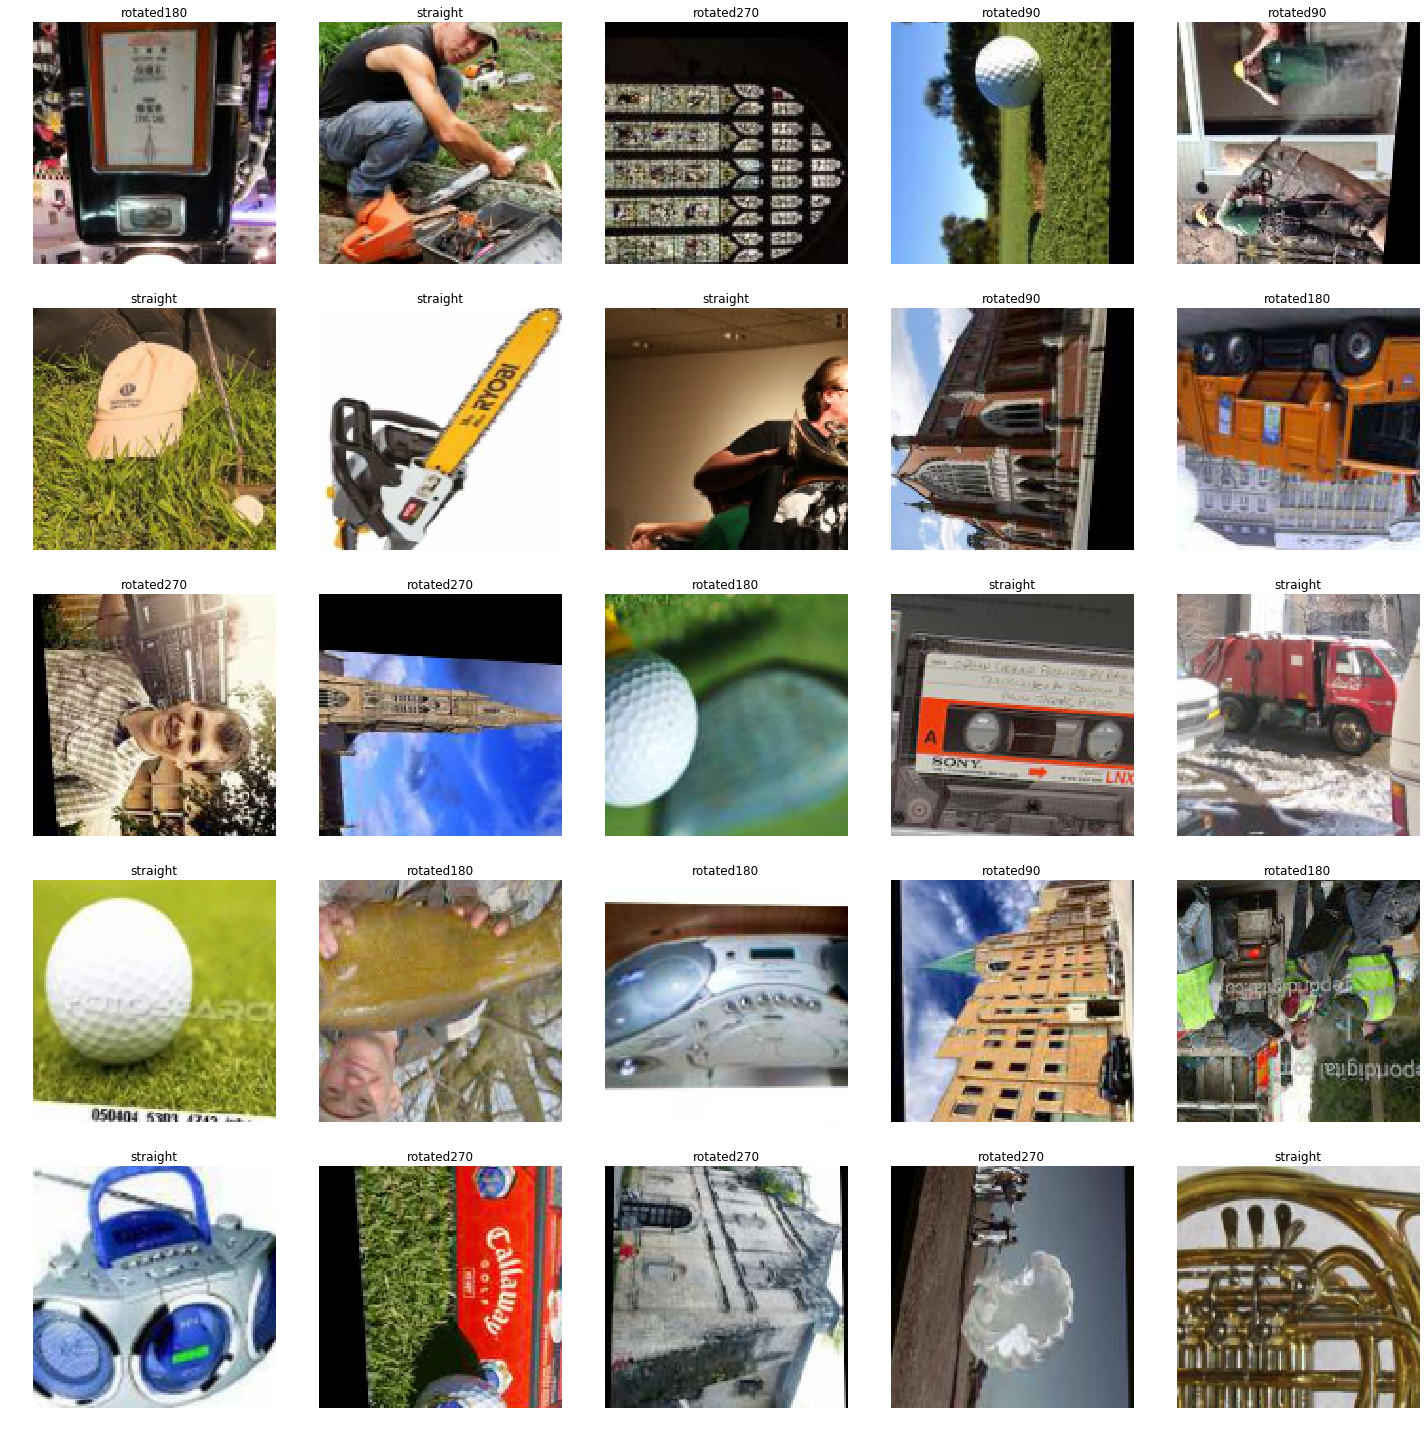

In [40]:
data.show_batch()

In [41]:
print(data.classes)
len(data.classes),data.c

['rotated180', 'rotated270', 'rotated90', 'straight']


(4, 4)

## Training

In [42]:
learn = cnn_learner(data, base_arch=models.resnet18, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


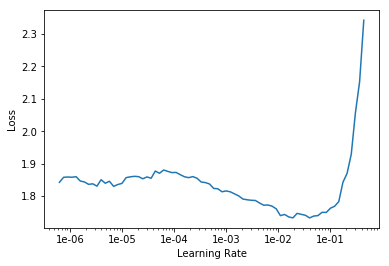

In [32]:
learn.lr_find()
learn.recorder.plot()

In [33]:
learn.fit_one_cycle(1,max_lr=1e-2)

In [35]:
learn.save('stage-1')

In [43]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (51576 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
straight,straight,straight,straight,straight
Path: /Users/sebastian/.fastai/data/is_img_rotated;

Valid: LabelList (2000 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
straight,straight,straight,straight,straight
Path: /Users/sebastian/.fastai/data/is_img_rotated;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1

In [44]:
tfmable = ll.transform(tfms, size=2*init_sz)

In [53]:
learn.data = tfmable.databunch(bs=bs, num_workers=0).normalize()

In [55]:
learn.unfreeze()

In [56]:
learn.fit_one_cycle(1,max_lr=slice(1e-5,1e-3))

In [58]:
learn.save('stage-2')

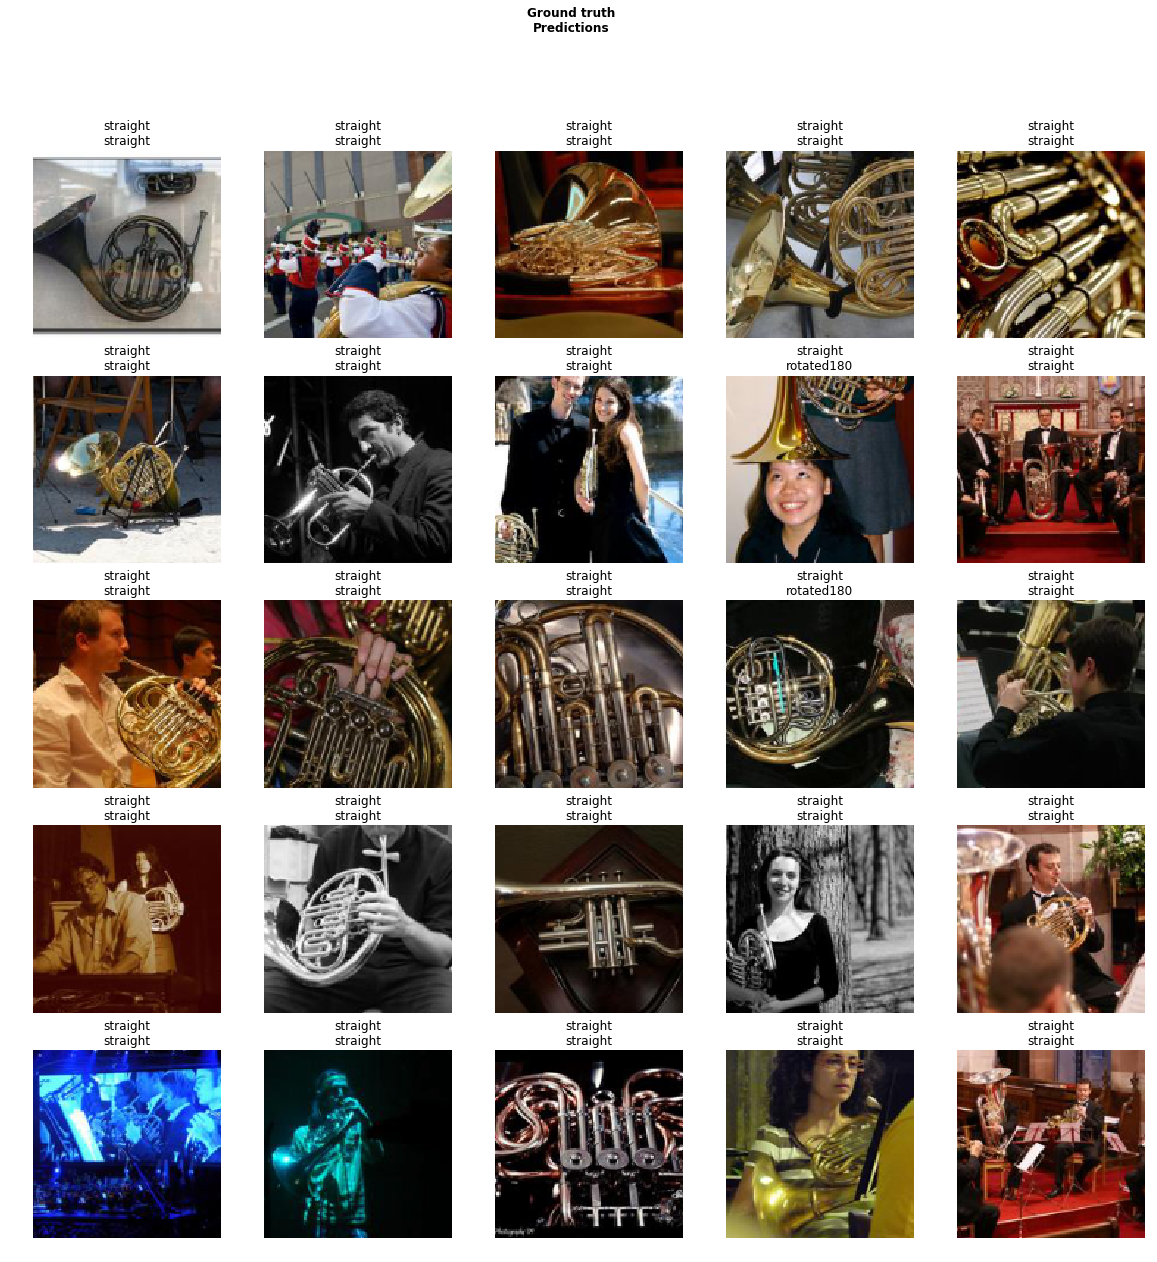

In [59]:
learn.show_results()

In [57]:
learn.export('/Users/sebastian/Development/deep-learning/is-img-rotated/app/models/isImgRotated-rn18-sz128.pkl')

## Results

In [60]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

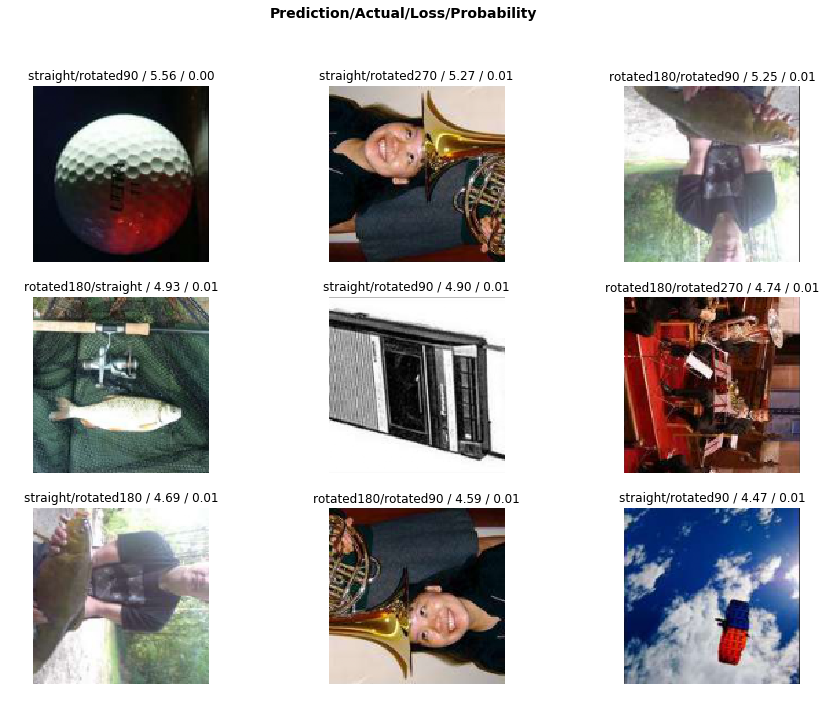

In [61]:
interp.plot_top_losses(9, figsize=(15,11))

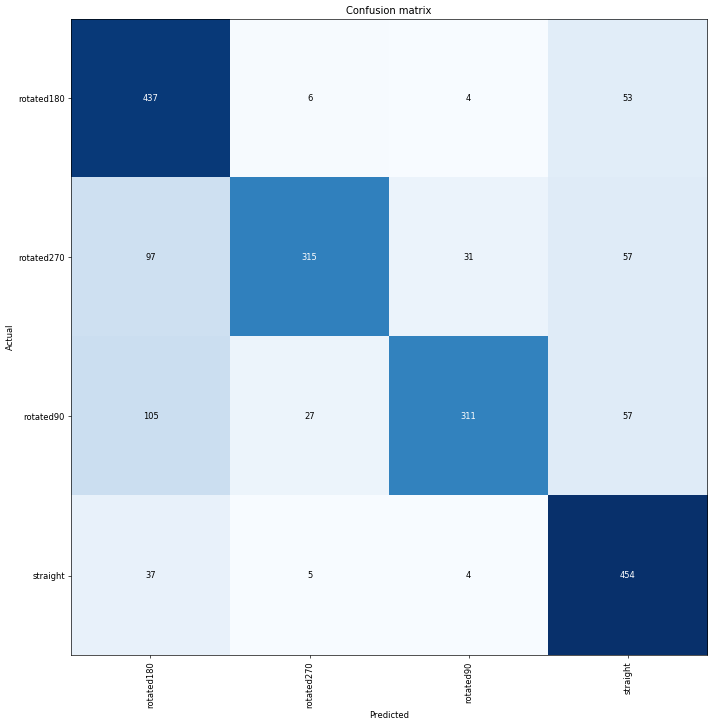

In [62]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [64]:
interp.most_confused(min_val=2)

[('rotated90', 'rotated180', 105),
 ('rotated270', 'rotated180', 97),
 ('rotated270', 'straight', 57),
 ('rotated90', 'straight', 57),
 ('rotated180', 'straight', 53),
 ('straight', 'rotated180', 37),
 ('rotated270', 'rotated90', 31),
 ('rotated90', 'rotated270', 27),
 ('rotated180', 'rotated270', 6),
 ('straight', 'rotated270', 5),
 ('rotated180', 'rotated90', 4),
 ('straight', 'rotated90', 4)]

## Test in production

In [65]:
# learn = load_learner(Path('/Users/sebastian/Development/deep-learning/is-img-rotated/app/models/'),
#                      'isImgRotated-dn121-sz128.pkl')
learn = load_learner(Path('/Users/sebastian/Development/deep-learning/is-img-rotated/app/models/'),
                     'isImgRotated-rn18-sz128.pkl')

In [6]:
# learn.load('stage-2')

In [66]:
url = 'https://media.wired.com/photos/598e35fb99d76447c4eb1f28/master/pass/phonepicutres-TA.jpg'
# url = 'https://images.unsplash.com/photo-1486673748761-a8d18475c757?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80'
path_local = Path('/Users/sebastian/Development/deep-learning/is-img-rotated/')
download_url(url,path_local/'img_test.jpg',overwrite=True)


In [68]:
img_test = open_image(path_local/'img_test.jpg')

In [69]:
## We only rotate by 90 each time because rotating applies also on the original image
img_test = open_image(path_local/'img_test.jpg')
img_rotated90 = img_test.rotate(90)
img_rotated90.save(path_local/'img_test_rotated90.jpg')
img_rotated180 = img_test.rotate(90)
img_rotated180.save(path_local/'img_test_rotated180.jpg')
img_rotated270 = img_test.rotate(90)
img_rotated270.save(path_local/'img_test_rotated270.jpg')

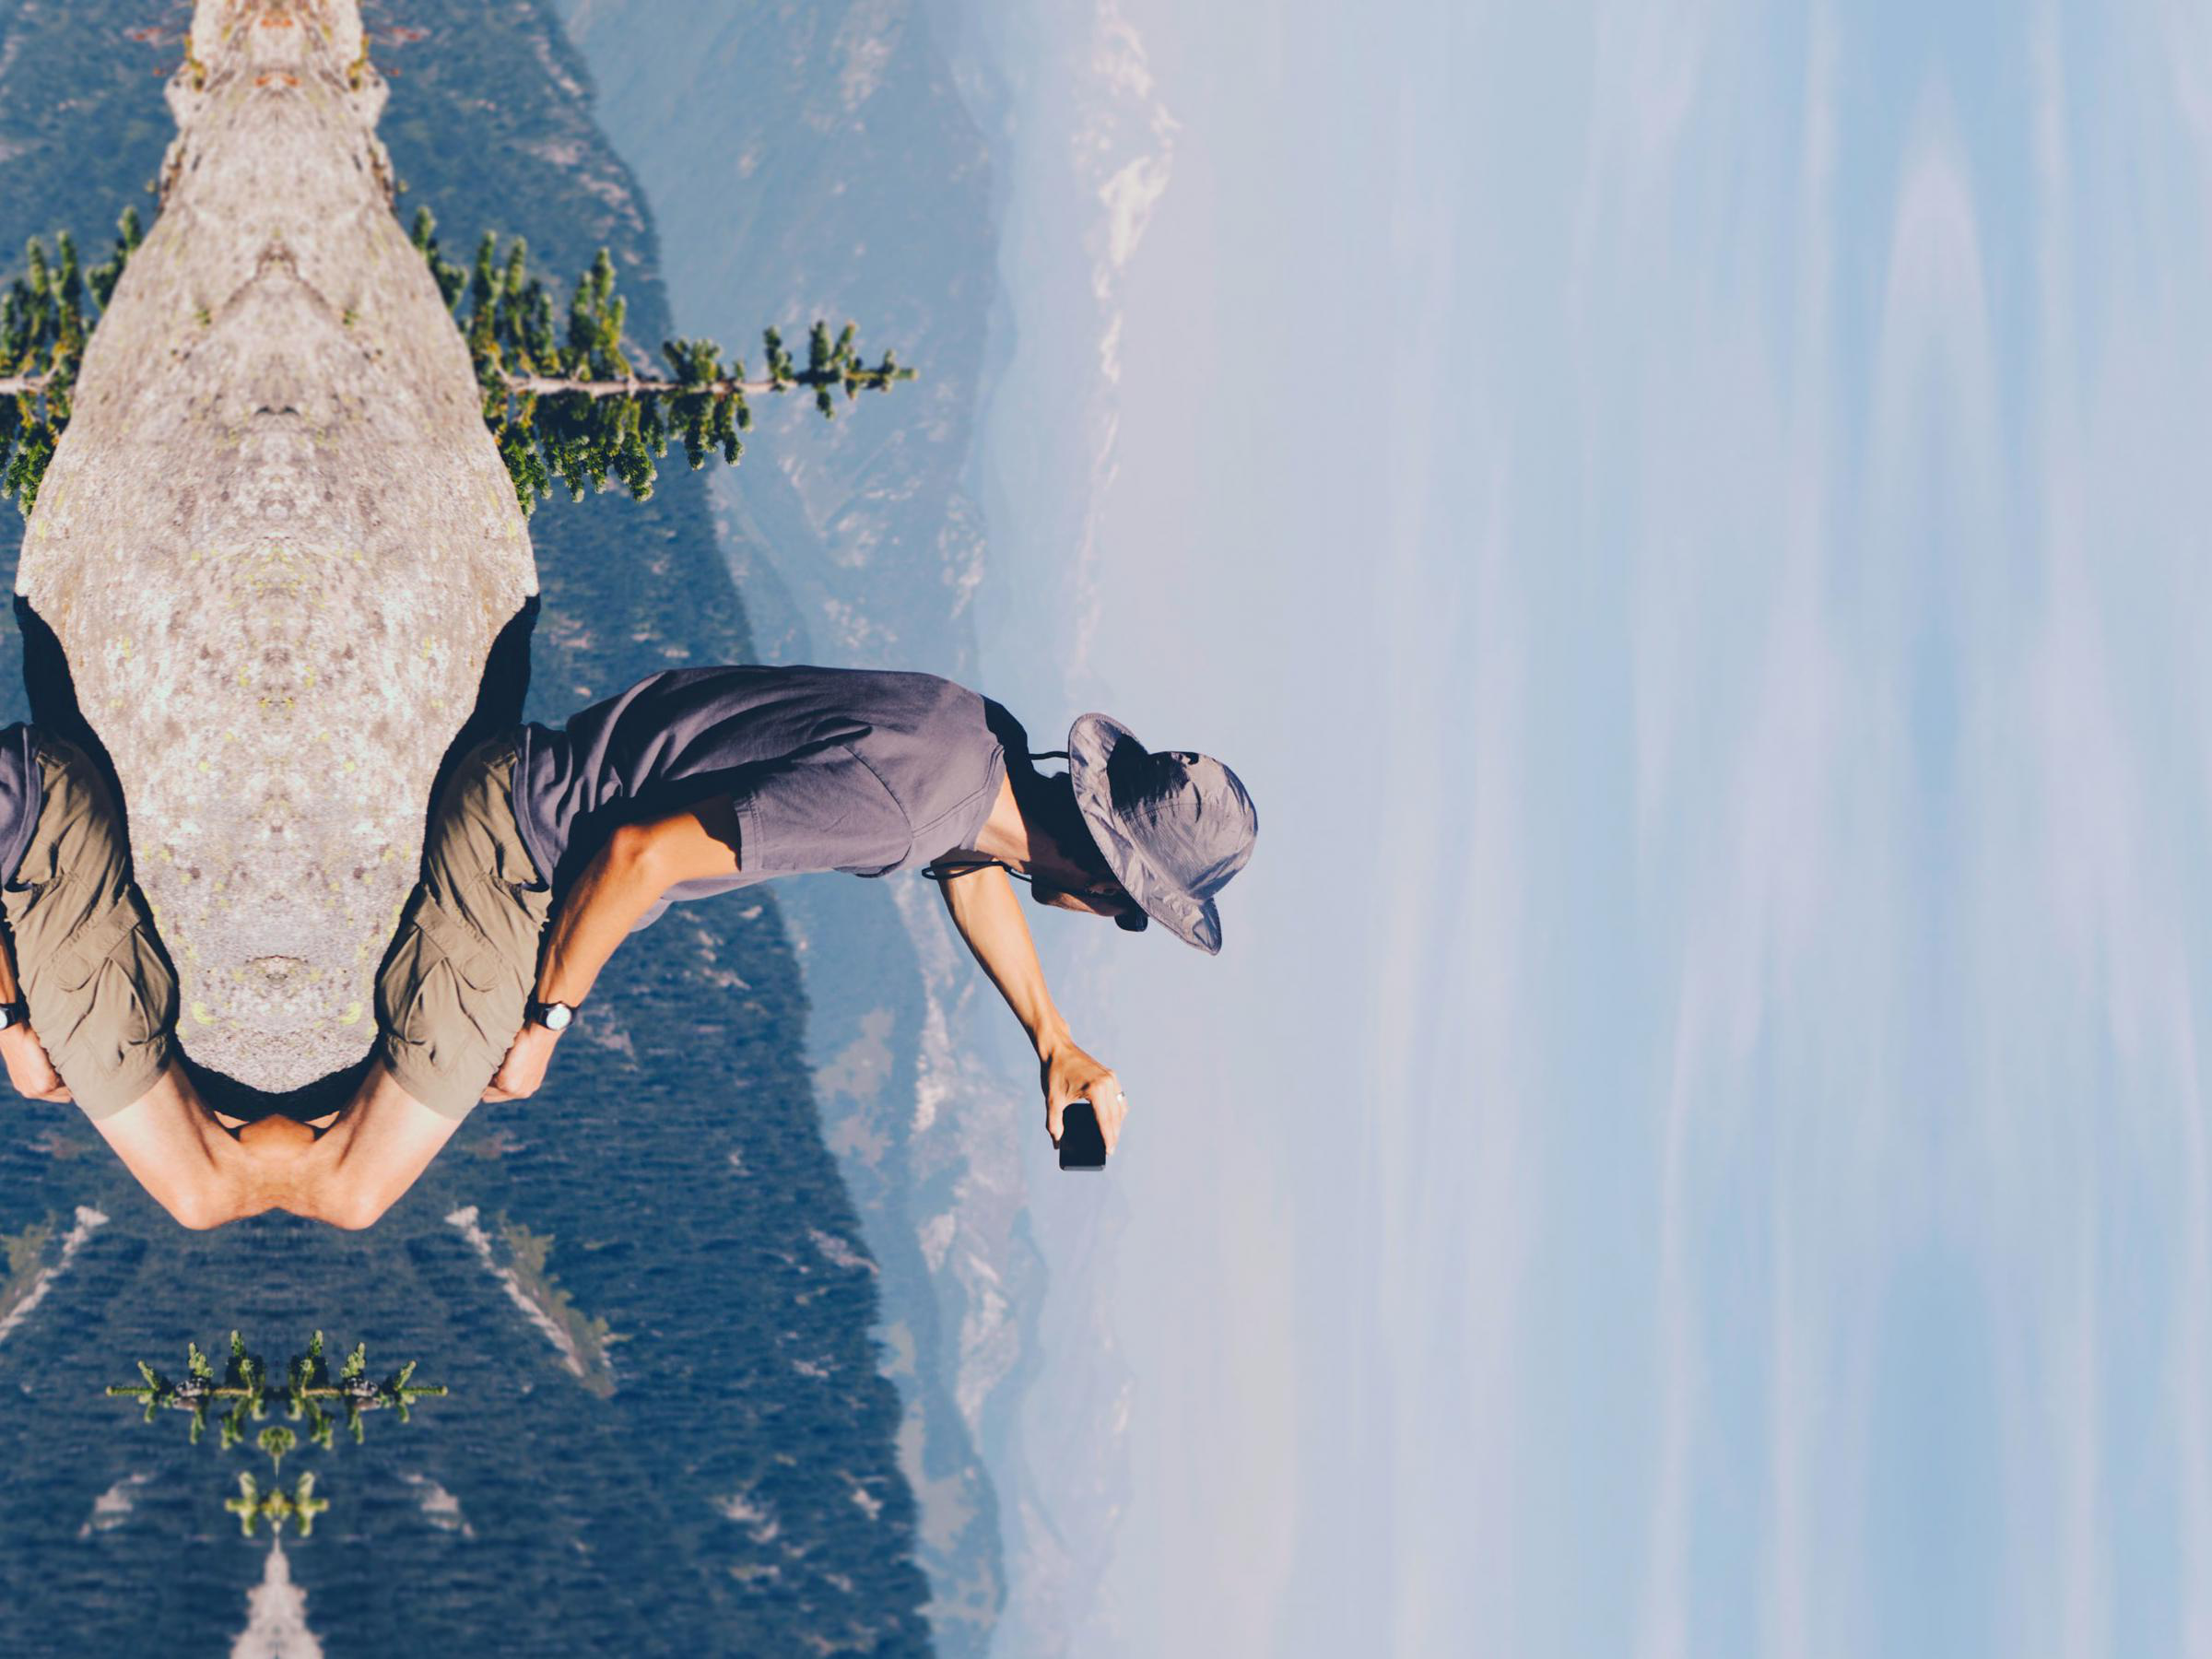

In [76]:
img = open_image(path_local/'img_test_rotated270.jpg')
img

In [77]:
learn.predict(img)

(Category rotated270, tensor(1), tensor([0.2302, 0.5013, 0.0237, 0.2448]))